# Visualização de Dados

## Matplotlib

A documentação pode ser acessada através do link: [matplotlib](https://matplotlib.org/)

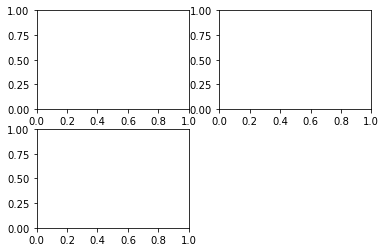

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

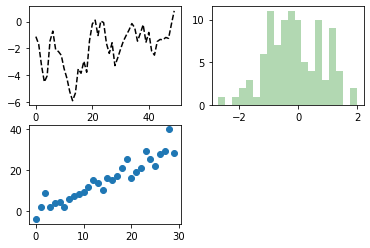

In [2]:
import numpy as np
from numpy.random import randn
ax1.plot(randn(50).cumsum(), 'k--')
ax2.hist(randn(100), bins=20, color='g', alpha=0.3)
ax3.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig

In [ ]:
l = np.linspace(0, 2, 100)
plt.plot(l, l, label='linear')
plt.plot(l, l**2, label='quadratic')
plt.plot(l, l**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

plt.legend()
plt.show()

In [ ]:
plt.plot(randn(30).cumsum(), color='r', linestyle='dashed', marker='.');
plt.savefig('plot2.png')

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My matplotlib plot')
ax.set_xlabel('Stages')

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(100).cumsum(), 'r', label='one')
ax.plot(randn(100).cumsum(), 'k--', label='two')
ax.plot(randn(100).cumsum(), 'g.', label='three')
ax.legend(loc='best')

## Tipos de Gráficos 

### Barra

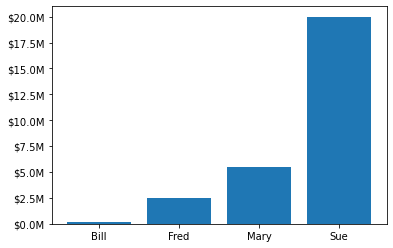

In [3]:
#barra
from matplotlib.ticker import FuncFormatter
x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]
def millions(x, pos):
    'valor e posição'
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

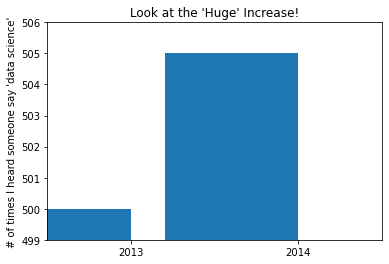

In [4]:
# Cuidado ao criar gráfico de barras

mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

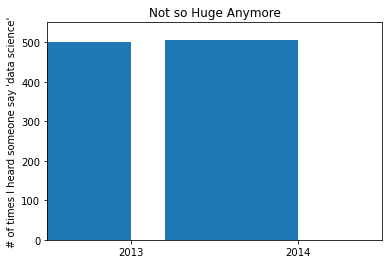

In [5]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not so Huge Anymore")
plt.show()

### Histograma

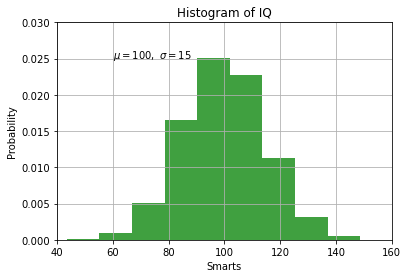

In [6]:
#histograma
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=' + str(mu) + ',\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Barra Empilhada

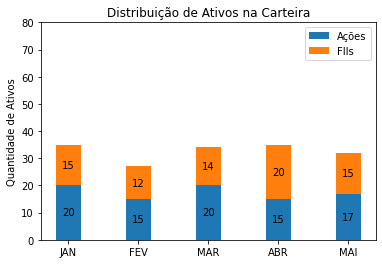

In [9]:
# barra empilhada
N = 5
qtde_acoes = np.array([20, 15, 20, 15, 17])
qtde_fiis = np.array([15, 12, 14, 20, 15])
ind = np.arange(N)    
width = 0.35       # largura das barras

p1 = plt.bar(ind, qtde_acoes, width)
p2 = plt.bar(ind, qtde_fiis, width,
             bottom=qtde_acoes)

plt.ylabel('Quantidade de Ativos')
plt.title('Distribuição de Ativos na Carteira')
plt.xticks(ind, ('JAN', 'FEV', 'MAR', 'ABR', 'MAI'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Ações', 'FIIs'))

for x,y,val in zip(ind,qtde_acoes/2, qtde_acoes):
    plt.text(x, y, "%.1d"%val, ha="center", va="center")
for x,y,val in zip(ind,qtde_acoes+qtde_fiis/2, qtde_fiis):
    plt.text(x, y, "%.1d"%val, ha="center", va="center")

plt.show()

### Scatter Plot

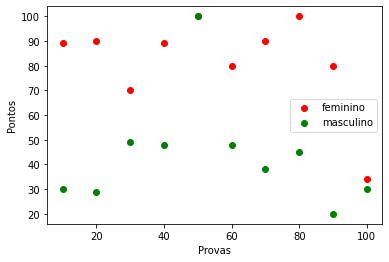

In [10]:
#Scatter-plot
pontos_f = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
pontos_m = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
range_pontos = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
feminino = plt.scatter(range_pontos, pontos_f, color='r')
masculino = plt.scatter(range_pontos, pontos_m, color='g')
plt.xlabel('Provas')
plt.ylabel('Pontos')
plt.legend((feminino, masculino),('feminino','masculino'),loc='best')
plt.show()

### Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x26c75727160>,
 'caps': [<matplotlib.lines.Line2D at 0x26c75783c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c757ae9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26c7581a340>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c7581a7f0>],
 'means': []}

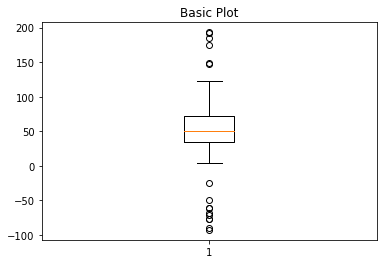

In [11]:
#Box plot
np.random.seed(19680801)

#criando dados fictícios
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

## TODO Section

#### Usando o dataset Pokemon.csv, resolva as seguintes questões:

    1) crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo.
    
    2) crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water.
    
    3) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Lendários e aqueles que não são lendários. Use stacked bar. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
poke = pd.read_csv('bases/Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


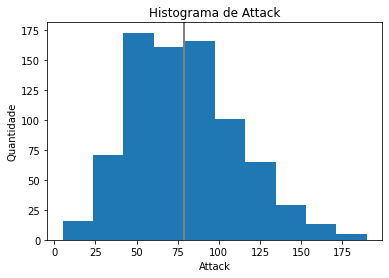

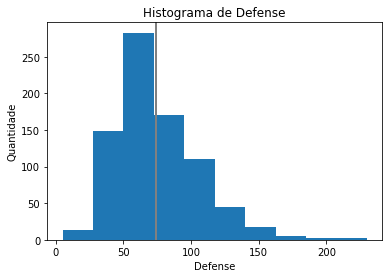

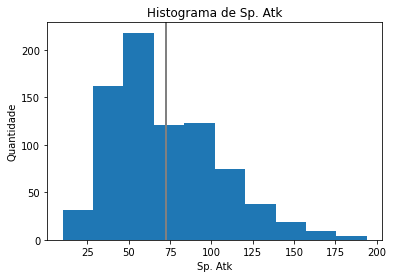

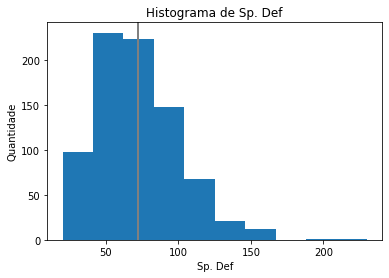

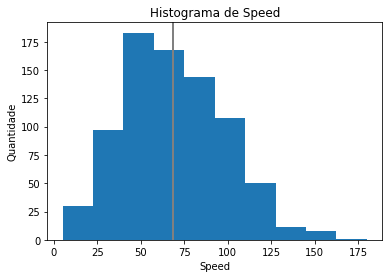

In [22]:
# resposta 1
def hist_ds_atributo(ds,atributo):
    plt.axvline(ds.mean(), color='gray', linewidth=2)
    plt.hist(ds)
    plt.xlabel(atributo)
    plt.ylabel('Quantidade')
    plt.title('Histograma de ' + atributo)
    plt.show()
    
atributo_list = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for atrib in atributo_list:
    hist_ds_atributo(poke[atrib], atrib)

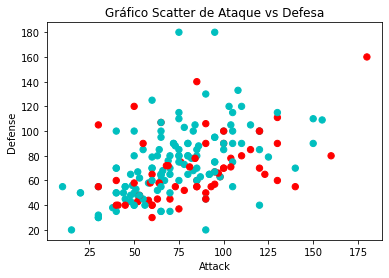

In [23]:
# resposta 2
cor = lambda x : 'c' if (x['Type 1']=='Water' or x['Type 2']=='Water') else 'r'
ds = poke[poke['Type 1'].isin(['Fire','Water']) | poke['Type 2'].isin(['Fire','Water'])]
plt.scatter(ds['Attack'], ds['Defense'], 40, ds.apply(cor, axis=1))
plt.title('Gráfico Scatter de Ataque vs Defesa')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

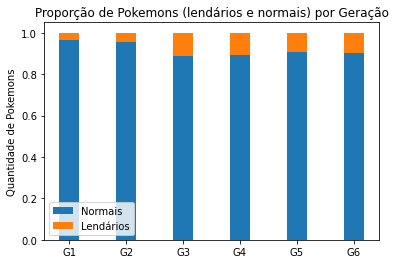

In [21]:
# resposta 3
lendarios = []
normais = []
for i in range(len(poke['Generation'].unique())):
    geracao = poke[poke['Generation']==i+1]
    lenda = geracao[geracao['Legendary']==True]
    norm = geracao[geracao['Legendary']==False]
    lendarios.append(len(lenda)/len(geracao))
    normais.append(len(norm)/len(geracao))
    
width = 0.35       # largura das barras

p1 = plt.bar(np.arange(len(normais)), np.array(normais), width)
p2 = plt.bar(np.arange(len(normais)), np.array(lendarios), width,
             bottom=normais)

plt.ylabel('Quantidade de Pokemons')
plt.title('Proporção de Pokemons (lendários e normais) por Geração')
plt.xticks(np.arange(len(normais)), ('G1', 'G2', 'G3', 'G4', 'G5', 'G6'))
plt.yticks(np.arange(0, 1.1,0.2))
plt.legend((p1[0], p2[0]), ('Normais', 'Lendários'))

In [ ]:
poke['Generation'].unique()